In [72]:
import numpy as np
import pandas as pd
import os, glob
import matplotlib.pyplot as plt
import scipy as sp

%matplotlib inline

In [11]:
from utils.tracking import extract
from utils.tracking import pseudo_voigt_fit1,gaus_fit1, voigt_fit1


In [67]:
## handling the 3D humidity only files. Only took the intergration of 
path  = 'C:/Users/Bin'+chr(39)+'s X1/Box/BNL March 2022 Data/AMohite2/maxs/analysis/3D_hum_only_test5/circular_average'

infiles = glob.glob(os.path.join(path, '*'+'*.dat'))

data = extract(infiles[0])

# find parameter index function


def find_params(filename):
    name = filename.split('\\')[-1]
    surname = filename.split('/')[-2]
    return name[len(surname):].split('.dat')[0].split('_')

# print(infiles)


In [100]:
# finding the start and end of an array for the 001 plane
x1_3D = np.where(abs(data[:,0]-.95)<= .01)
ind1 = x1_3D[0][0]
x2_3D = np.where(abs(data[:,0]-1.1)<= .01)
ind2 =x2_3D[0][0]


# finding the start and end of an array for the lead iodide peak
x1_pb = np.where(abs(data[:,0]-.85)<= .01)
ind1_pb = x1_pb[0][0]
x2_pb = np.where(abs(data[:,0]-.97)<= .01)
ind2_pb =x2_pb[0][0]

# plt.figure(figsize = (7,8))
# plt.plot(data[ind1:ind2,0],data[ind1:ind2,1])

# assuming the 
time_val = [x for x in parameters if 's' in x][0][:-1]
print(time_val)

val_pb= []
val_3D = []
time = []
for i in range(len(infiles)):
    data = extract(infiles[i])
    # print(infiles[i])
    parameters = find_params(infiles[i])

    # dont look at the other x position values here
    position = [x for x in parameters if 'x' in x][0]

    if 'x-0.0' not in position:
        # print([x for x in parameters if 'x' in x][0])
        continue
    
    time_val = [x for x in parameters if 's' in x][0][:-1]
    time.append(float(time_val))
    val_3D.append(sp.integrate.trapz(data[ind1:ind2,1]))
    val_pb.append(sp.integrate.trapz(data[ind1_pb:ind2_pb,1]))



val_pb_pos2 = []
val_3D_pos2 = []
time_pos2 = []
for i in range(len(infiles)):
    data = extract(infiles[i])
    # print(infiles[i])
    parameters = find_params(infiles[i])

    # dont look at the other x position values here
    position = [x for x in parameters if 'x' in x][0]

    if 'x-0.0' in position:
        # print([x for x in parameters if 'x' in x][0])
        continue
    
    time_val = [x for x in parameters if 's' in x][0][:-1]
    time_pos2.append(float(time_val))
    val_3D_pos2.append(sp.integrate.trapz(data[ind1:ind2,1]))
    val_pb_pos2.append(sp.integrate.trapz(data[ind1_pb:ind2_pb,1]))





289.0


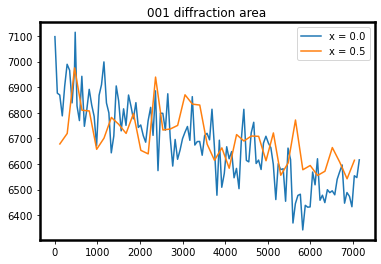

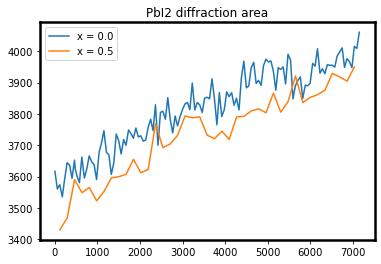

In [104]:
# plt.plot(time, val_3D, '*')

time = np.array(time)
time_pos2 = np.array(time_pos2)
val_3D = np.array(val_3D)
val_pb = np.array(val_pb)
val_3D_pos2 = np.array(val_3D_pos2)
val_pb_pos2 = np.array(val_pb_pos2)


indt = np.argsort(time)
indt2 = np.argsort(time_pos2)

plt.figure()
plt.plot(time[indt], val_3D[indt], label = 'x = 0.0')
plt.plot(time_pos2[indt2],val_3D_pos2[indt2], label= 'x = 0.5')
plt.title('001 diffraction area')
plt.legend()



plt.figure()
plt.plot(time[indt], val_pb[indt], label = 'x = 0.0')
plt.plot(time_pos2[indt2],val_pb_pos2[indt2], label = 'x = 0.5')
plt.title('PbI2 diffraction area')
plt.legend()


In [3]:
# This is to double check the beam0 position in calibration

path45  = 'C:/Users/Bin'+chr(39)+'s X1/Box/BNL March 2022 Data/AMohite2/maxs/analysis/3D_hum_only_test5/plus_45'
path_45 = 'C:/Users/Bin'+chr(39)+'s X1/Box/BNL March 2022 Data/AMohite2/maxs/analysis/3D_hum_only_test5/minus_45'
path_zero = 'C:/Users/Bin'+chr(39)+'s X1/Box/BNL March 2022 Data/AMohite2/maxs/analysis/3D_hum_only_test5/zero'



infiles1 = glob.glob(os.path.join(path45, '*_0.0*'+'*.dat'))
infiles2 = glob.glob(os.path.join(path_45, '*_0.0*'+'*.dat'))
infiles3 = glob.glob(os.path.join(path_zero, '*_0.0*'+'*.dat'))

print(infiles1)
print(infiles2)
print(infiles3)

data_plus = extract(infiles1[0])
data_minus = extract(infiles2[0])
data_zero = extract(infiles3[0])

# finding the start and end of an array
x1 = np.where(abs(data_plus[:,0]-.95)<= .01)
ind1 = x1[0][0]
x2 = np.where(abs(data_plus[:,0]-1.08)<= .01)
ind2 =x2[0][0]


# plt.plot(data0[ind1:ind2,0],data0[ind1:ind2,1])
plt.figure(figsize = (10,8))
result1 = pseudo_voigt_fit1(data_plus[ind1:ind2,:],[1, 2000, .001, .5, -5, 100])


from utils.tracking import pseudo_voigt_fit1,gaus_fit1


# finding the start and end of an array
x1 = np.where(abs(data_minus[:,0]-.95)<= .01)
ind1 = x1[0][0]
x2 = np.where(abs(data_minus[:,0]-1.1)<= .01)
ind2 =x2[0][0]


# plt.plot(data0[ind1:ind2,0],data0[ind1:ind2,1])
plt.figure(figsize = (10,8))
result1 = gaus_fit1(data_minus[ind1:ind2,:],[1, 1, 2000, -5, 100])

plt.figure(figsize = (10,8))
result1 = voigt_fit1(data_plus[ind1:ind2,:],[1, 2000, .01, .01, -1, 100])


# finding the start and end of an array
x1 = np.where(abs(data_minus[:,0]-.2)<= .01)
ind1 = x1[0][0]
x2 = np.where(abs(data_minus[:,0]-3)<= .01)
ind2 =x2[0][0]

plt.figure(figsize = (8,10))
plt.plot(data_plus[ind1:ind2,0], data_plus[ind1:ind2,1], 'r')
plt.plot(data_minus[ind1:ind2,0], data_minus[ind1:ind2,1], 'b')
plt.plot(data_zero[ind1:ind2,0], data_zero[ind1:ind2,1], 'g')


["C:/Users/Bin's X1/Box/BNL March 2022 Data/AMohite2/maxs/analysis/3D_hum_only_test5/plus_45\\3D_hum_only_test5_2_0.0s_RH33.926_x-0.000_th0.200_1.00s_451162_maxs.dat"]
["C:/Users/Bin's X1/Box/BNL March 2022 Data/AMohite2/maxs/analysis/3D_hum_only_test5/minus_45\\3D_hum_only_test5_2_0.0s_RH33.926_x-0.000_th0.200_1.00s_451162_maxs.dat"]
["C:/Users/Bin's X1/Box/BNL March 2022 Data/AMohite2/maxs/analysis/3D_hum_only_test5/zero\\3D_hum_only_test5_2_0.0s_RH33.926_x-0.000_th0.200_1.00s_451162_maxs.dat"]
